In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates
import dask.array as da
import seaborn as sns

In [2]:
##################################### read the era5 data -- t2m, t850, z500 ##############################################################################

In [4]:
ds_era = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/era5/2021.h5')

In [30]:
ds_era5_rh =  ds_era.fields[656:737:4,18,260:40:-1,720:1200]

In [31]:
ds_era5_rh[15,:,:]

<xarray.DataArray 'fields' (phony_dim_0: 21, phony_dim_2: 220, phony_dim_3: 480)>
[2217600 values with dtype=float32]
Dimensions without coordinates: phony_dim_0, phony_dim_2, phony_dim_3

In [14]:
ds_ec_1 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_cf_20210615_00_pl.nc')
variable_data_ec_1_r = ds_ec_1['r'][56,1,:,:]

In [15]:
variable_data_ec_1_r

<xarray.DataArray 'r' (latitude: 221, longitude: 481)>
[106301 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... -60.5 -60.25 -60.0
  * latitude   (latitude) float32 80.0 79.75 79.5 79.25 ... 25.5 25.25 25.0
    level      int32 850
    time       datetime64[ns] 2021-06-29
Attributes:
    units:          %
    long_name:      Relative humidity
    standard_name:  relative_humidity

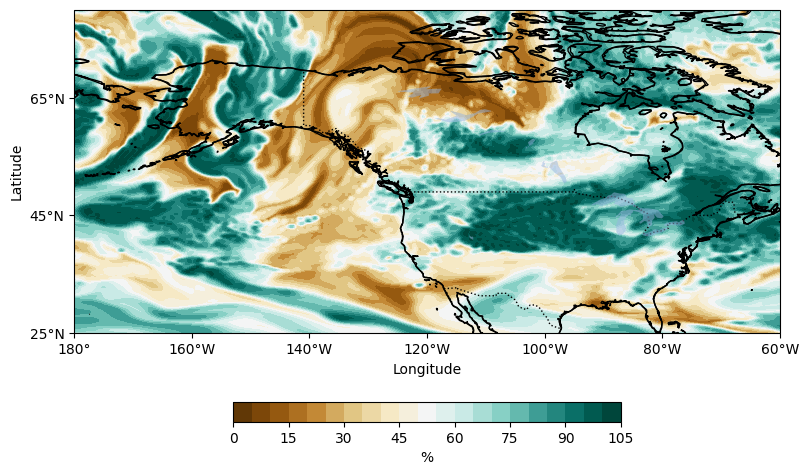

In [16]:
#check the anomaly distribution
lat = np.linspace(25, 80, 221)
lon = np.linspace(-180, -60, 481)
lon_grid, lat_grid = np.meshgrid(lon, lat)


fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())
x, y = lon_grid, lat_grid  
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
                  
# Add map 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='w')


ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map

#contour1 = ax.contourf(x,y,anomaly_era5_z500_na_0629_interpolated/9.80665,cmap='coolwarm',levels=20)
#contour1 = ax.contourf(x,y,ds_fcnv2_ec_0614['tciwv'][59,260:40:-1,720:1200],cmap='BrBG',levels=20)
contour1 = ax.contourf(x,y,variable_data_ec_1_r,cmap='BrBG',levels=20)

cbar = plt.colorbar(contour1, ax=ax, label='%',orientation='horizontal',shrink=0.5)

# Set plot title and labels

plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.savefig('/home/kit/imk-tro/gj5173/plots07.27/climatology.png', bbox_inches='tight',dpi=100)
# Show the plot
plt.show()

In [20]:
ds_fcnv2_era_0615 = xr.open_dataset('/pfs/work7/workspace/scratch/gj5173-ws_ai_models/era5/20210615/forecasts/fcnv2_fc_era5_20210615_0000_m0.nc',engine = 'netcdf4')

In [22]:
ds_fcnv2_era_0615["r"][47,10,40:261,720:1201]

<xarray.DataArray 'r' (lat: 221, lon: 481)>
[106301 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2021-06-27
  * lon      (lon) float32 180.0 180.2 180.5 180.8 ... 299.2 299.5 299.8 300.0
  * lat      (lat) float32 80.0 79.75 79.5 79.25 79.0 ... 25.75 25.5 25.25 25.0
    plev     float64 8.5e+04
Attributes:
    standard_name:  relative_humidity
    long_name:      Relative humidity
    units:          %
    param:          1.1.0

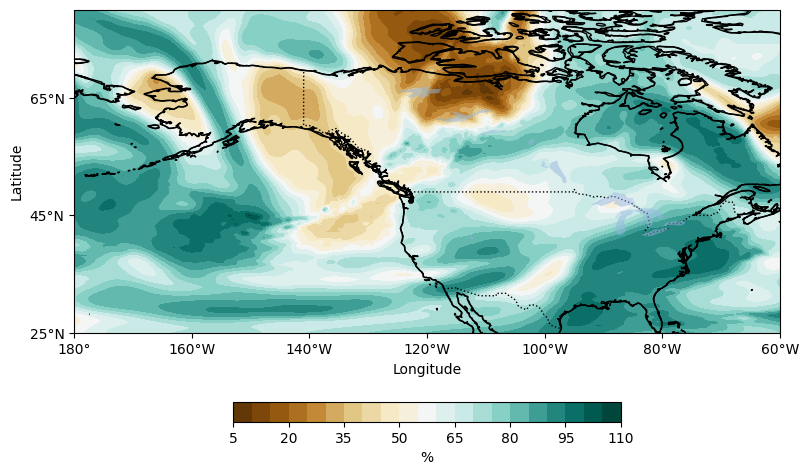

In [23]:
#check the anomaly distribution
lat = np.linspace(25, 80, 221)
lon = np.linspace(-180, -60, 481)
lon_grid, lat_grid = np.meshgrid(lon, lat)


fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())
x, y = lon_grid, lat_grid  
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
                  
# Add map 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='w')


ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map

#contour1 = ax.contourf(x,y,anomaly_era5_z500_na_0629_interpolated/9.80665,cmap='coolwarm',levels=20)
#contour1 = ax.contourf(x,y,ds_fcnv2_ec_0614['tciwv'][59,260:40:-1,720:1200],cmap='BrBG',levels=20)
contour1 = ax.contourf(x,y,ds_fcnv2_era_0615["r"][47,10,40:261,720:1201],cmap='BrBG',levels=20)

cbar = plt.colorbar(contour1, ax=ax, label='%',orientation='horizontal',shrink=0.5)

# Set plot title and labels

plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.savefig('/home/kit/imk-tro/gj5173/plots07.27/climatology.png', bbox_inches='tight',dpi=100)
# Show the plot
plt.show()

In [24]:
def calculate_batch_difference(v1, v2, batch_size):
    """
    Calculate the point-wise difference between two arrays (v2 - v1) in batches.

    Parameters:
    - v1: The first input array.
    - v2: The second input array.
    - batch_size: The desired batch size for processing.

    Returns:
    - An array containing the point-wise differences between v2 and v1.
    """
    # Get the shape of the input arrays
    rows, cols = v1.shape
    
    # Initialize the difference array
    difference = np.empty((rows, cols))

    for i in range(0, rows, batch_size):
        for j in range(0, cols, batch_size):
            batch_variable1 = v1[i:i + batch_size, j:j + batch_size]
            batch_variable2 = v2[i:i + batch_size, j:j + batch_size]
            
            # Calculate the difference point by point for the current batch
            batch_difference = batch_variable2 - batch_variable1

            # Update the difference array with the current batch_difference
            difference[i:i + batch_size, j:j + batch_size] = batch_difference

    return difference

In [27]:
diff_rh= calculate_batch_difference(ds_fcnv2_era_0615["r"][47,10,40:261,720:1201].values,variable_data_ec_1_r.values,50)

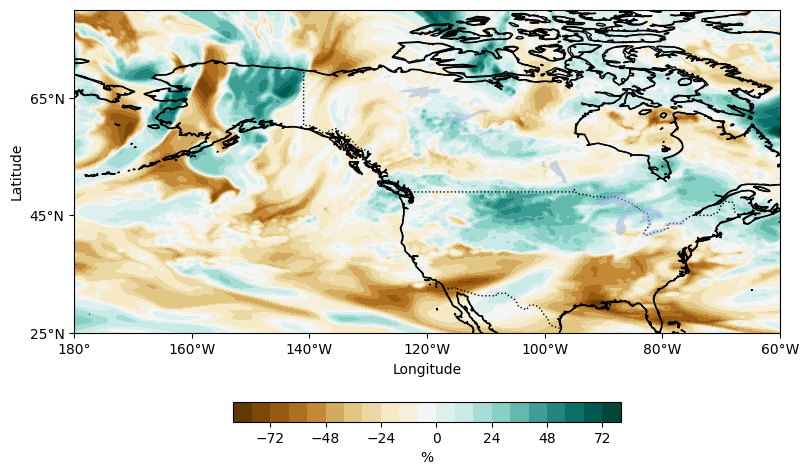

In [28]:
#check the anomaly distribution
lat = np.linspace(25, 80, 221)
lon = np.linspace(-180, -60, 481)
lon_grid, lat_grid = np.meshgrid(lon, lat)


fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())
x, y = lon_grid, lat_grid  
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
                  
# Add map 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='w')


ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map

#contour1 = ax.contourf(x,y,anomaly_era5_z500_na_0629_interpolated/9.80665,cmap='coolwarm',levels=20)
#contour1 = ax.contourf(x,y,ds_fcnv2_ec_0614['tciwv'][59,260:40:-1,720:1200],cmap='BrBG',levels=20)
contour1 = ax.contourf(x,y,diff_rh,cmap='BrBG',levels=20)

cbar = plt.colorbar(contour1, ax=ax, label='%',orientation='horizontal',shrink=0.5)

# Set plot title and labels

plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.savefig('/home/kit/imk-tro/gj5173/plots07.27/climatology.png', bbox_inches='tight',dpi=100)
# Show the plot
plt.show()

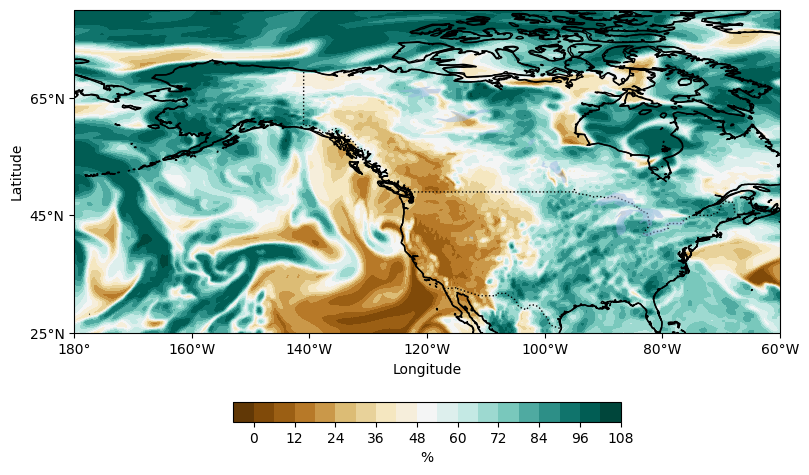

In [33]:
#check the anomaly distribution
lat = np.linspace(25, 80, 220)
lon = np.linspace(-180, -60, 480)
lon_grid, lat_grid = np.meshgrid(lon, lat)


fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())
x, y = lon_grid, lat_grid  
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
ax.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
                  
# Add map 
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.OCEAN, facecolor='w')


ax.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map

#contour1 = ax.contourf(x,y,anomaly_era5_z500_na_0629_interpolated/9.80665,cmap='coolwarm',levels=20)
#contour1 = ax.contourf(x,y,ds_fcnv2_ec_0614['tciwv'][59,260:40:-1,720:1200],cmap='BrBG',levels=20)
contour1 = ax.contourf(x,y,ds_era5_rh[15,:,:],cmap='BrBG',levels=20)

cbar = plt.colorbar(contour1, ax=ax, label='%',orientation='horizontal',shrink=0.5)

# Set plot title and labels

plt.xlabel('Longitude')
plt.ylabel('Latitude')

#plt.savefig('/home/kit/imk-tro/gj5173/plots07.27/climatology.png', bbox_inches='tight',dpi=100)
# Show the plot
plt.show()